Ali Morajjabi - 610300104
<br>
<h1 style="color:red">Data Fitting & Denoising</h1>

____
____

<h4 style="color:orange"> Auxiliary functions </h4>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def load_image(path,size = (256,256)):
    img = cv2.imread(path,0)
    img = cv2.resize(img, size)
    return img

def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]


___

<h2 style="color:yellow">Q1</h2>

<h3 style="color:skyblue">Q1.1</h3>

In [2]:
def RLS_Denoising(b, lam=0.1):
    
    # Regularization Matrix L
    L = np.zeros((255, 256))
    for i in range(255):
        L[i][i] = 1
        L[i][i + 1] = -1
        
    # Calculating X_RLS
    X_RLS = np.linalg.inv(np.eye(256) + lam * L.T @ L) @ b

    return X_RLS

<h3 style="color:skyblue">Q1.2</h3>

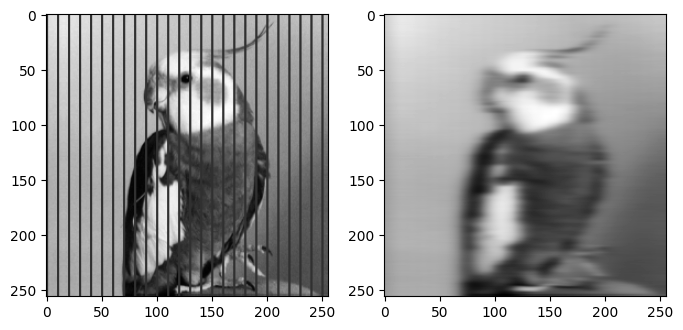

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img1.png")
rotated_img_mat = cv2.rotate(img_mat, cv2.ROTATE_90_CLOCKWISE)

b1 = rotated_img_mat.copy()
for i in range(1, 6):
    b1 = RLS_Denoising(b=b1, lam=i*1.7)


ax1.imshow(img_mat,cmap='gray')
ax2.imshow(cv2.rotate(b1, cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray')
plt.show()

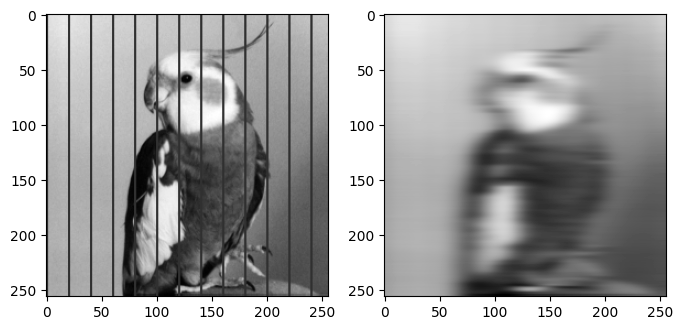

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img2.png")
rotated_img_mat = cv2.rotate(img_mat, cv2.ROTATE_90_CLOCKWISE)

b1 = rotated_img_mat.copy()
for i in range(0, 8):
    b1 = RLS_Denoising(b=b1, lam=i*2)


ax1.imshow(img_mat,cmap='gray')
ax2.imshow(cv2.rotate(b1, cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray')
plt.show()

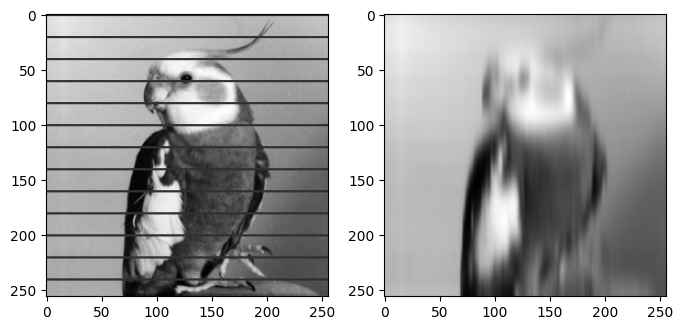

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img3.png")


b1 = img_mat.copy()
# for i in range(6, 1, -1):
#     b1 = RLS_Image_Denoising(b=b1, lam=i*2)
for i in range(1, 8):
    b1 = RLS_Denoising(b=b1, lam=i*2)
    

ax1.imshow(img_mat,cmap='gray')
ax2.imshow(b1, cmap='gray')
plt.show()

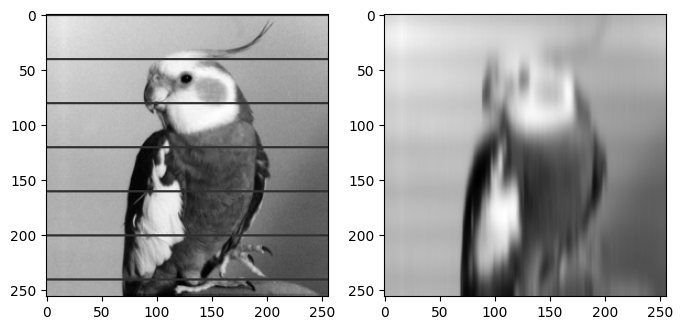

In [175]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img4.png")


b1 = img_mat.copy()
for i in range(8):
    b1 = RLS_Denoising(b=b1, lam=i*2)
    

ax1.imshow(img_mat,cmap='gray')
ax2.imshow(b1, cmap='gray')
plt.show()

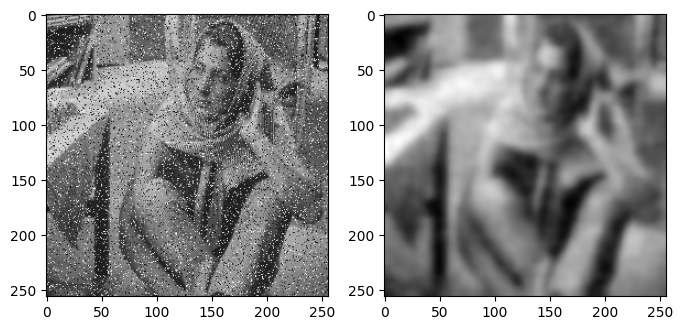

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img5.png")
rotated_img_mat = cv2.rotate(img_mat, cv2.ROTATE_90_CLOCKWISE)

b1 = img_mat.copy()
for i in range(1, 4):
    b1 = RLS_Denoising(b=b1, lam=3)

b1 = cv2.rotate(b1, cv2.ROTATE_90_CLOCKWISE)
for i in range(1, 4):
    b1 = RLS_Denoising(b=b1, lam=3)


ax1.imshow(img_mat,cmap='gray')
ax2.imshow(cv2.rotate(b1, cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray')
plt.show()

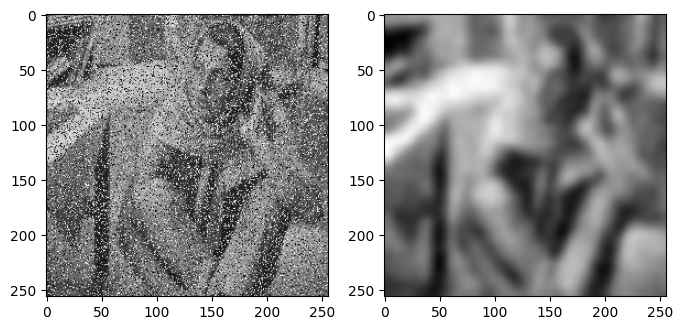

In [177]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img6.png")
rotated_img_mat = cv2.rotate(img_mat, cv2.ROTATE_90_CLOCKWISE)

b1 = img_mat.copy()
for i in range(0, 5):
    b1 = RLS_Denoising(b=b1, lam=3)

b1 = cv2.rotate(b1, cv2.ROTATE_90_CLOCKWISE)
for i in range(0, 5):
    b1 = RLS_Denoising(b=b1, lam=3)


ax1.imshow(img_mat,cmap='gray')
ax2.imshow(cv2.rotate(b1, cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray')
plt.show()

___

<h3 style="color:skyblue">Q1.3</h3>

<p>

<h4 style="color:#c4c249"> Is this method suitable? </h4>
RLS denoising is suitable for image denoising tasks due to its adaptive nature, effectiveness in reducing Gaussian noise, preservation of image details, versatility across different image types, and robust performance across varying noise levels. Its adaptability, coupled with its ability to maintain image clarity while reducing noise, makes it well-suited for a wide range of imaging applications.

<h4 style="color:#c4c249"> Weaknesses </h4>
<strong> Computational Complexity: </strong> RLS involves matrix inversions and multiplications, which can be computationally expensive, especially for large images or real-time applications.<br>
<strong> Memory Requirements: </strong> RLS requires storing and updating the inverse covariance matrix, which can consume a significant amount of memory, especially for high-dimensional images.<br>
<strong> Sensitivity to Model Mismatch: </strong> RLS assumes a specific model for the noise and the signal. If the actual noise differs significantly from the assumed model, RLS may not perform optimally.<br>
<strong> Tuning Parameters: </strong> RLS denoising typically involves tuning parameters such as forgetting factor and regularization parameter. Selecting appropriate values for these parameters can be challenging and may require empirical testing.<br>
<strong> Edge Preservation: </strong> While RLS can effectively remove noise, it may also blur or distort edges in the image, leading to loss of detail and sharpness.

<h4 style="color:#c4c249"> It's performance in different noise types </h4>
RLS denoising demonstrated its best performance in images containing random dot noises. For both vertical and horizontal noise types, its performance was relatively similar. However, a common weakness observed across all types of noise is the potential loss of image details during the denoising process.

</p>

<h3 style="color:skyblue">Q1.4</h3>

<p>

<h5 style="color:#c4c249"> Difference in denoising with Lambda=X and X times with Lambda=1 </h5>

<strong> Using λ = X: </strong> When setting λ = X, you're essentially adjusting the regularization parameter to a specific value, X. This parameter controls the trade-off between the data fidelity term and the regularization term in the RLS denoising algorithm. A higher λ value results in stronger regularization, which tends to smooth out the image more aggressively, potentially leading to loss of finer details.<br><br>
<strong> Denoising X times with λ = 1: </strong> Denoising the image X times with λ = 1 involves applying the RLS denoising algorithm iteratively, each time with λ set to 1. In each iteration, the algorithm updates the estimate of the clean image based on the current estimate and the noisy input. This iterative process can help in gradually reducing noise while preserving finer details in the image, as each iteration applies a mild amount of regularization.

</p>

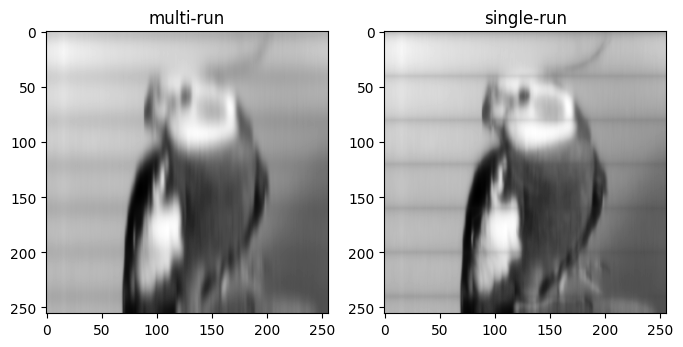

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
img_mat = load_image(path="images/img4.png")


b1 = img_mat.copy()
for i in range(30):
    b1 = RLS_Denoising(b=b1, lam=1)

b2 = RLS_Denoising(img_mat, lam=30)


ax1.set_title("multi-run")
ax1.imshow(b1,cmap='gray')
ax2.set_title("single-run")
ax2.imshow(b2, cmap='gray')
plt.show()

<h3 style="color:skyblue">Q1.5</h3>

To Do Later :) 

____
____

<h2 style="color:yellow">Q2</h2>

In [ ]:
# Loading the data

data_1 = np.array(load_data("data/Data1.txt"))
data_1 = data_1[data_1[:, 0].argsort()]
x1_i, y1_i = data_1[:, 0], data_1[:, 1]

data_2 = np.array(load_data("data/Data2.txt"))
data_2 = data_2[data_2[:, 0].argsort()]
x2_i, y2_i = data_2[:, 0], data_2[:, 1]

data_3 = np.array(load_data("data/Data3.txt"))
data_3 = data_3[data_3[:, 0].argsort()]
x3_i, y3_i = data_3[:, 0], data_3[:, 1]

data_4 = np.array(load_data("data/Data4.txt"))
data_4 = data_4[data_4[:, 0].argsort()]
x4_i, y4_i = data_4[:, 0], data_4[:, 1]

print(len(data_1), len(data_2), len(data_3), len(data_4))

<h3 style="color:skyblue">Q2.1</h3>

In [180]:
# << Data Fitting Function Definition >>
def data_fit(x_i, y_i, n):
    U = np.zeros((x_i.shape[0], n+1))
    
    for i in range(U.shape[0]):
        for j in range(n+1):
            U[i][j] = (x_i[i])**j
    
    x_LS = np.linalg.inv(U.T @ U) @ U.T @ y_i
    return x_LS

In [239]:
# << Error Calculator >>
def prediction_error(poly, x, y):
    
    error = 0
    for idx in range(x.shape[0]):
        predicted_value = poly(x[idx])
        error += abs(predicted_value - y[idx])

    return error

<h3 style="color:skyblue">Q2.2</h3>

           8             7             6             5            4
2.751e-09 x + 6.639e-08 x - 3.576e-06 x - 5.108e-05 x + 0.001527 x
            3          2
 + 0.00972 x - 0.2299 x + 0.01469 x + 9.176


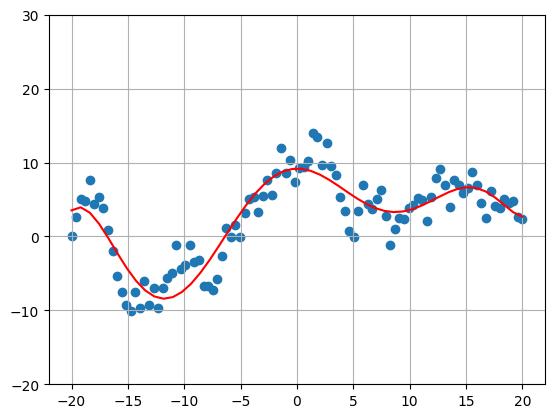

Error Rate: 203.25621257005943


In [248]:
# << Dataset 1 >>

coefficients = data_fit(x1_i, y1_i, 8)
p = np.poly1d(coefficients[::-1])
print(p)

x = np.linspace(-20, 20)
y = p(x)

plt.plot(x, y, "red")
plt.scatter(x1_i, y1_i)
plt.ylim(-20, 30)
plt.grid(True)
plt.show()
print(f"Error Rate: {prediction_error(p, x1_i, y1_i)}")

           20             19             18             17
5.565e-31 x  - 6.599e-27 x  - 6.895e-27 x  + 8.875e-23 x 
             16             15             14             13
 + 3.63e-23 x  - 5.135e-19 x  - 1.058e-19 x  + 1.665e-15 x 
              12             11             10             9
 + 1.863e-16 x  - 3.295e-12 x  - 2.032e-13 x  + 4.048e-09 x
              8             7             6            5             4
 + 1.349e-10 x - 2.998e-06 x - 5.152e-08 x + 0.001228 x + 1.001e-05 x
           3            2
 - 0.2317 x - 0.000756 x + 12.86 x + 0.009488


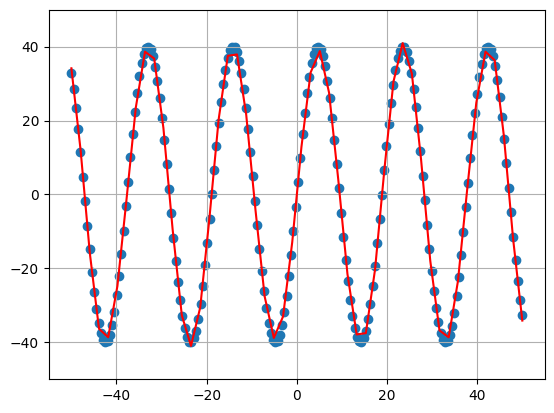

Error Rate: 142.95677198410584


In [249]:
# << Dataset 2 >>

coefficients = data_fit(x2_i, y2_i, 20)
p = np.poly1d(coefficients[::-1])
print(p)

x = np.linspace(-50, 50)
y = p(x)

plt.plot(x, y, "red")
plt.scatter(x2_i, y2_i)
plt.ylim(-50, 50)
plt.grid(True)
plt.show()
print(f"Error Rate: {prediction_error(p, x2_i, y2_i)}")

<h3 style="color:skyblue">Q2.3</h3>

In [250]:
def RLS_Denoising_dp(b, lam):
    # Regularization Matrix L
    L = np.eye(b.shape[0], k=-1) - np.eye(b.shape[0])

    # Calculating X_RLS
    X_RLS = np.linalg.inv(np.eye(b.shape[0]) + lam * L.T @ L) @ b

    return X_RLS

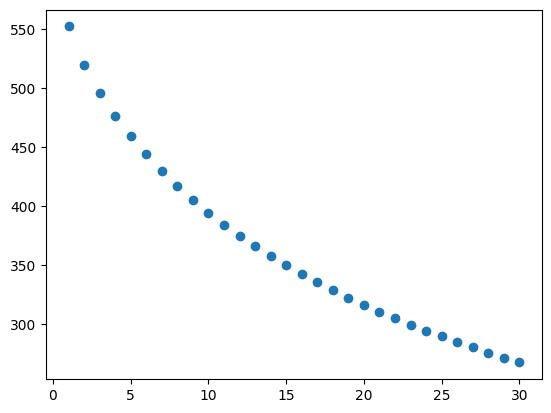

In [251]:
# << Dataset 3 >>
error_track3 = list()
POLY_DEGREE = 10

for lamb in range(1, 31):
    denoised_data3 = RLS_Denoising_dp(y3_i, lamb)
    coefficients = data_fit(x3_i, denoised_data3, POLY_DEGREE)
    error_track3.append((lamb, prediction_error(np.poly1d(coefficients[::-1]), x3_i, denoised_data3)))

error_track3 = np.array(error_track3)
plt.scatter(error_track3[:, 0], error_track3[:, 1])
plt.show()

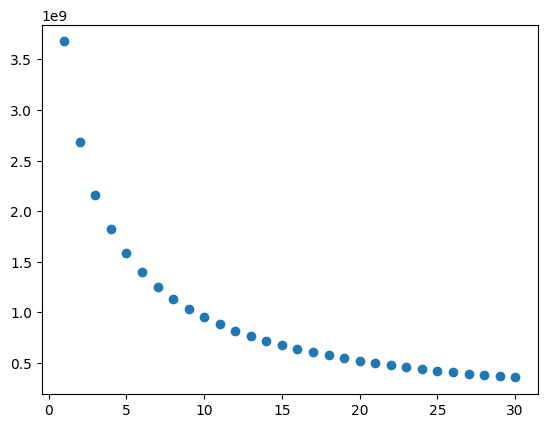

In [252]:
# << Dataset 4 >>
error_track4 = list()
POLY_DEGREE = 10

for lamb in range(1, 31):
    denoised_data4 = RLS_Denoising_dp(y4_i, lamb)
    coefficients = data_fit(x4_i, denoised_data4, POLY_DEGREE)
    error_track4.append([lamb, prediction_error(np.poly1d(coefficients[::-1]), x4_i, denoised_data4)])

error_track4 = np.array(error_track4)
plt.scatter(error_track4[:, 0], error_track4[:, 1])
plt.show()

____

<h3 style="color:skyblue">Q2.4</h3>

<p>
No, it is not always possible to find a polynomial that fits any given dataset perfectly. The ability to fit a polynomial to a dataset depends on several factors, including the complexity of the underlying function, the presence of noise or outliers, and the degree of the polynomial.
</p>

<h3 style="color:skyblue">Q2.5</h3>

<p>
removing noise points (outliers) can generally improve the precision of polynomial fitting by reducing overfitting, improving accuracy and enhancing generalization, it should be done carefully and in conjunction with other denoising techniques, if necessary. The effectiveness of this approach depends on the nature and distribution of the noise in the dataset.
</p>